# EDA: bike station across london boroughs

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import random
import geopandas as gpd
from folium.plugins import HeatMap
from IPython.display import IFrame

In [60]:
# import
bike_locs = pd.read_csv('/Users/tabea/Documents/UrbanMobility/data/bike_locations.csv')

### 1. Visualize all bike station locations with ID's

In [61]:
import folium

# create a map centered on London
london_coords = (51.5074, -0.1278)
base_map1 = folium.Map(location=london_coords, zoom_start=12, tiles='Stamen Toner')

# add markers for each bike station location
for index, row in bike_locs.iterrows():
    popup_text = f"{row['name']} (id: {row['id']}) (terminal id: {row['terminalId']})"
    marker = folium.Marker(location=(row['lat'], row['lon']), popup=popup_text)
    marker.add_to(base_map1)

# add a heatmap layer
heat_data = [[row['lat'], row['lon']] for index, row in bike_locs.iterrows()]
heatmap = folium.FeatureGroup(heat_data)
heatmap.add_to(base_map1)

# save the map as an HTML file
base_map1.save('./data/map_bike_locs.html')

# plot
IFrame('map_bike_locs.html', width=900, height=500)

### 2. Distribution of bike stations across london boroughs

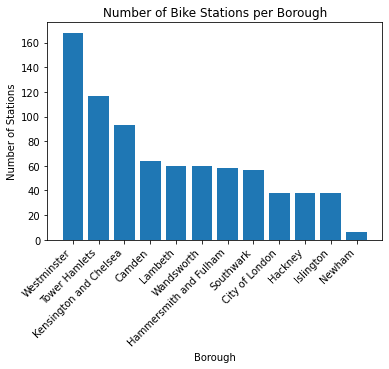

In [62]:
# create a bar chart with the number of stations per borough
borough_counts = bike_locs.groupby('borough').size()
borough_counts = borough_counts.sort_values(ascending=False)

# set up the bar chart
fig, ax = plt.subplots()
ax.bar(borough_counts.index, borough_counts.values)
ax.set_title('Number of Bike Stations per Borough')
ax.set_xlabel('Borough')
ax.set_ylabel('Number of Stations')
plt.xticks(rotation=45, ha='right')

plt.show()

### 3. Visualize london boroughs on map -> use color to distinguish the ones that have bike stations

In [63]:
# read the GeoJSON data for London borough boundaries
boroughs_geojson = gpd.read_file('https://skgrange.github.io/www/data/london_boroughs.json')

# define a dictionary that maps borough names to random colors
boroughs = sorted(bike_locs['borough'].unique())
colors = {}
for borough in boroughs:
    r = random.randint(0, 255)
    g = random.randint(0, 255)
    b = random.randint(0, 255)
    colors[borough] = f"#{r:02x}{g:02x}{b:02x}"
    
default_color = '#999999'

def style_function(feature):
    borough_name = feature['properties']['name']
    if borough_name in colors:
        fill_color = colors[borough_name]
    else:
        fill_color = default_color
    return {
        'fillColor': fill_color,
        'color': 'black',
        'weight': 2,
        'fillOpacity': 0.5
    }
  
# create a map centered on London
london_coords = (51.5074, -0.1278)
base_map = folium.Map(location=london_coords, zoom_start=10, tiles='Stamen Toner')

# add the borough boundaries to the map
folium.GeoJson(boroughs_geojson, name='geojson', style_function=style_function).add_to(base_map)

# save the map as an HTML file
base_map.save('map_london_boroughs.html')

# plot
IFrame('map_london_boroughs.html', width=900, height=500)

### 4. Visualize the bike locations by borough

In [64]:
import random
import branca.colormap as cm

# create a map centered on London
london_coords = (51.5074, -0.1278)
base_map3 = folium.Map(location=london_coords, zoom_start=11.5, tiles='Stamen Toner')


# define a dictionary that maps borough names to random colors
boroughs = sorted(bike_locs['borough'].unique())
colors = {}
for borough in boroughs:
    r = random.randint(0, 255)
    g = random.randint(0, 255)
    b = random.randint(0, 255)
    colors[borough] = f"#{r:02x}{g:02x}{b:02x}"

# add markers for each bike location, colored based on the borough
for index, row in bike_locs.iterrows():
    popup_text = f"{row['name']} (borough: {row['borough']}))"
    marker = folium.CircleMarker(location=(row['lat'], row['lon']), radius=5, popup=popup_text, fill=True, color=colors[row['borough']], fill_opacity=0.7)
    marker.add_to(base_map3)
    
# save the map as an HTML file
base_map3.save('map_bike_loc_borough_marker.html')

# plot
IFrame('map_bike_loc_borough_marker.html', width=900, height=500)

### 5. visualize the bike location counts by borough

In [65]:
import folium
from folium.plugins import HeatMap

# group the data by borough and count the number of bike locations in each borough
borough_counts = bike_locs.groupby('borough').size()

# create a map centered on London
london_coords = (51.5074, -0.1278)
base_map2 = folium.Map(location=london_coords, zoom_start=12, tiles='Stamen Toner')

# create a heatmap layer with the bike location counts for each borough
heatmap_layer = HeatMap(
    list(zip(bike_locs['lat'], bike_locs['lon'], borough_counts)),
    name='Bike Locations',
    min_opacity=0.4,
    radius=40,
    blur=10,
    max_zoom=1,
)

# add a heatmap layer
heatmap_layer.add_to(base_map2)

# save the map as an HTML file
base_map2.save('map_bike_loc_borough_heatmap.html')

# plot
IFrame('map_bike_loc_borough_heatmap.html', width=900, height=500)